# Import Libraries & Global Constants

In [14]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
# Seed for reproducibility
SEED = 42

# Load Data

In [6]:
# Load the data from the CSV file
listings = pd.read_csv('data/listings.csv')

# Exploratory Data Analysis

In [50]:
# List the columns in the data
print(listings.columns)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [65]:
# List the types of the data
print(listings.dtypes)


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


In [52]:
listings.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.009900e+04,1.009900e+04,1.009900e+04,10099.000000,10099.000000,0.0,10099.000000,10099.000000,10099.000000,8884.000000,...,7361.000000,7361.000000,7361.000000,7360.000000,0.0,10099.000000,10099.000000,10099.000000,10099.000000,7385.000000
mean,7.277618e+17,2.024063e+13,1.755817e+08,2.864046,3.471532,NaN,59.921761,10.759973,3.439251,1.144023,...,4.845406,4.908087,4.838026,4.774560,NaN,2.466482,2.093178,0.353401,0.019507,1.224864
std,4.279843e+17,0.000000e+00,1.797291e+08,10.046270,11.127133,NaN,0.020585,0.043214,1.810203,0.405963,...,0.296190,0.248023,0.267326,0.340093,NaN,9.174954,9.098139,1.397438,0.266123,1.574437
min,4.293200e+04,2.024063e+13,4.306700e+04,1.000000,1.000000,NaN,59.817260,10.591050,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,5.940418e+17,2.024063e+13,3.373941e+07,1.000000,1.000000,NaN,59.913290,10.736792,2.000000,1.000000,...,4.800000,4.910000,4.780000,4.690000,NaN,1.000000,1.000000,0.000000,0.000000,0.270000
50%,9.005968e+17,2.024063e+13,9.303204e+07,1.000000,1.000000,NaN,59.922820,10.762670,3.000000,1.000000,...,4.950000,5.000000,4.920000,4.860000,NaN,1.000000,1.000000,0.000000,0.000000,0.660000
75%,1.071329e+18,2.024063e+13,2.743167e+08,2.000000,2.000000,NaN,59.931701,10.779821,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.480000
max,1.189092e+18,2.024063e+13,5.860672e+08,131.000000,178.000000,NaN,60.041562,10.942936,16.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,94.000000,94.000000,21.000000,6.000000,13.210000


In [59]:
# Identify missing values in the listings DataFrame
missing_values = listings.isnull().sum()

#Print the count of missing values for all the columns with missing values
print("Count of missing values for all the columns with missing values:")
print(missing_values[missing_values > 0])

# Amount of columns with missing values
print("\nAmount of columns with missing values:")
print(len(missing_values[missing_values > 0]))


Count of missing values for all the columns with missing values:
description                       364
neighborhood_overview            6361
host_location                    1703
host_about                       6632
host_response_time               2117
host_response_rate               2117
host_acceptance_rate             1309
host_is_superhost                 104
host_neighbourhood               8832
neighbourhood                    6361
neighbourhood_group_cleansed    10099
bathrooms                        1215
bathrooms_text                      6
bedrooms                          173
beds                             1210
price                            1249
calendar_updated                10099
has_availability                  390
first_review                     2714
last_review                      2714
review_scores_rating             2714
review_scores_accuracy           2738
review_scores_cleanliness        2738
review_scores_checkin            2738
review_scores_communica

In [61]:
# Identify outliers
def count_outliers_z_score(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        
        # Calculate Z-scores
        z_scores = (df[column] - mean) / std_dev
        
        # Count outliers
        outliers = df[(z_scores < -3) | (z_scores > 3)]
        outlier_counts[column] = len(outliers)
    
    # Converts to DF for pretty printing
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df

# Get the number of outliers in each column using Z-score
outlier_counts_listings = count_outliers_z_score(listings)

# Display the outlier counts as a table
print("\nOutlier counts using Z-score:")
print(outlier_counts_listings)



Outlier counts using Z-score:
                                          Column  Outlier Count
0                                             id              0
1                                      scrape_id              0
2                                        host_id              0
3                            host_listings_count            111
4                      host_total_listings_count            114
5                   neighbourhood_group_cleansed              0
6                                       latitude            208
7                                      longitude            121
8                                   accommodates            152
9                                      bathrooms            226
10                                      bedrooms             95
11                                          beds            157
12                                minimum_nights             55
13                                maximum_nights              1
14       

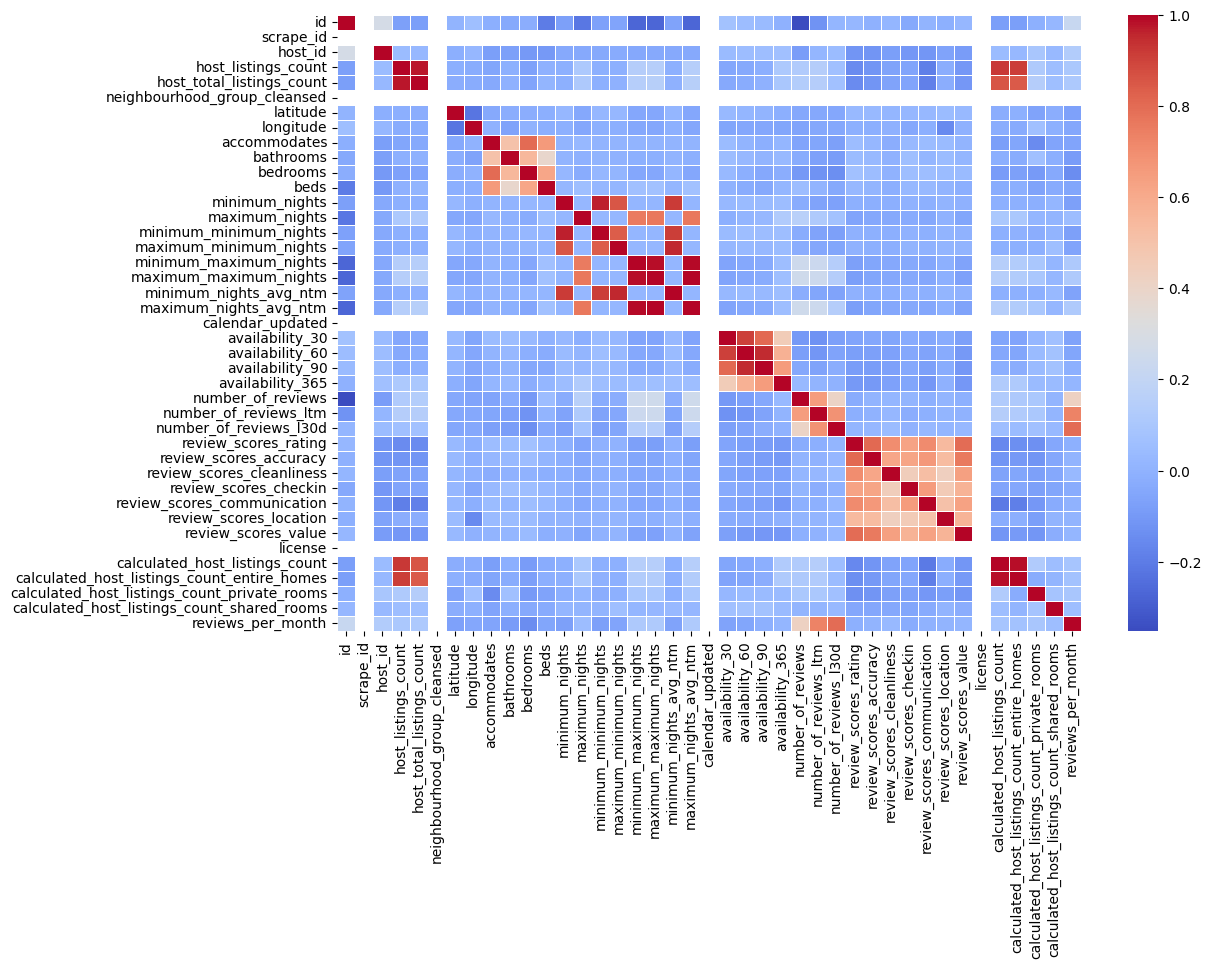

In [20]:
# Select only the columns with numeric data
numeric_listings = listings.select_dtypes(include=['float64', 'int64'])

# Visualize correlations between features for float values
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_listings.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

# Data cleaning



In [7]:
def clean_price(df):
    df_copy = df.copy()
    # Remove the commas and dollar signs from the price column
    df_copy['price'] = df_copy['price'].str.replace("$", "").str.replace(",", "").astype(float)
    return df_copy

def drop_string_columns(df):
    #Drop all non-numeric columns
    df_copy = df.select_dtypes(include=['float64', 'int64'])
    return df_copy

def drop_empty_columns(df):
    # Drop columns with no values
    df_copy = df.dropna(axis=1, how='all')
    return df_copy

def fill_missing_values(df):
    # Fill missing values with the mean of the column
    df_copy = df.fillna(df.mean())

    return df_copy


In [8]:
# Clean the price column in the listings data

cleaned_listings = clean_price(listings)
cleaned_listings = drop_string_columns(cleaned_listings)
cleaned_listings = drop_empty_columns(cleaned_listings)
cleaned_listings = fill_missing_values(cleaned_listings)

# Assert all values are numeric
assert cleaned_listings.dtypes.all() != np.dtype('O'), 'Not all values are numeric'


In [86]:
cleaned_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.009900e+04,1.009900e+04,1.009900e+04,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,...,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000
mean,7.277618e+17,2.024063e+13,1.755817e+08,2.864046,3.471532,59.921761,10.759973,3.439251,1.144023,1.603768,...,4.758576,4.845406,4.908087,4.838026,4.774560,2.466482,2.093178,0.353401,0.019507,1.224864
std,4.279843e+17,0.000000e+00,1.797291e+08,10.046270,11.127133,0.020585,0.043214,1.810203,0.380758,0.935990,...,0.315198,0.252867,0.211745,0.228225,0.290328,9.174954,9.098139,1.397438,0.266123,1.346336
min,4.293200e+04,2.024063e+13,4.306700e+04,1.000000,1.000000,59.817260,10.591050,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,5.940418e+17,2.024063e+13,3.373941e+07,1.000000,1.000000,59.913290,10.736792,2.000000,1.000000,1.000000,...,4.750000,4.845406,4.908087,4.830000,4.760000,1.000000,1.000000,0.000000,0.000000,0.390000
50%,9.005968e+17,2.024063e+13,9.303204e+07,1.000000,1.000000,59.922820,10.762670,3.000000,1.000000,1.000000,...,4.758576,4.845406,4.940000,4.838026,4.774560,1.000000,1.000000,0.000000,0.000000,1.150000
75%,1.071329e+18,2.024063e+13,2.743167e+08,2.000000,2.000000,59.931701,10.779821,4.000000,1.144023,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.224864
max,1.189092e+18,2.024063e+13,5.860672e+08,131.000000,178.000000,60.041562,10.942936,16.000000,5.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,94.000000,94.000000,21.000000,6.000000,13.210000


# Preprocessing 

In [15]:
# Split the data into training and test sets where y is the price and X is the rest of the data
y = cleaned_listings['price']
X = cleaned_listings.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Modelling



## Linear Regressor

In [40]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", model.score(X_test, y_test))


Coefficients: [-3.09242077e-16  4.24990736e-10 -2.96668238e-07 -2.22900313e-02
 -2.78753706e-02 -1.46865270e-04  2.40917551e-04 -3.30589526e-03
 -3.12593636e-03 -9.23684884e-03 -5.70794715e-02 -1.49269526e-01
  2.33249495e-01 -1.38017438e-01 -1.08950943e-01 -3.05359978e-01
  1.20765932e-02 -1.14671572e-01  6.79441336e-02  7.49053369e-02
  5.22587885e-02  1.54146359e-01  1.48109517e+00 -7.86088825e-02
  4.05579629e-01  8.47219299e-02  1.03324565e-03  2.62885282e-04
  1.71807956e-03 -2.13964711e-03  2.77991250e-04 -1.98890586e-04
  1.13884233e-03 -2.46958416e-02 -2.95774084e-02  3.34134234e-03
  1.70819559e-03  1.25993403e-01]
Intercept: -6811.244264168546
R^2: 0.0053515570636772924


### Results of Linear regression
- Bad

## DecisionTreeRegressor

In [41]:
model = DecisionTreeRegressor(max_depth=15, random_state=SEED)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Print the R^2 score
print("R^2:", model.score(X_test, y_test))

# Print the first 5 predictions rounding to 1 decimal place
print(np.round(predictions[:5], 1))

# Print the first 5 actual values
print(np.round(y_test[:5].values,1))


R^2: -0.8524184999938846
[2321.  1159.3 1362.4 1317.3 1153.7]
[ 700. 1000. 1200. 1429.  800.]


### Results of Linear Regression
- Bad


## Random Tree Regressor 


In [43]:
# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50],
    'max_depth': [None, 10,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=SEED)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=25; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   6.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   6.9s
[CV] END max_depth=No

KeyboardInterrupt: 

In [39]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R^2 score: ", grid_search.best_score_)

# Pick the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test_scaled)

# Print the R^2 score on the test set
print("R^2 on test set: ", best_rf_model.score(X_test_scaled, y_test))

# Print the first 5 predictions rounding to 1 decimal place
print(np.round(rf_predictions[:5], 1))

# Print the first 5 actual values
print(np.round(y_test[:5].values, 1))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best R^2 score:  0.138667815787772
R^2 on test set:  0.2535492407997537
[2022.9 1142.3 1222.3 1306.1 1144.7]
[ 700. 1000. 1200. 1429.  800.]


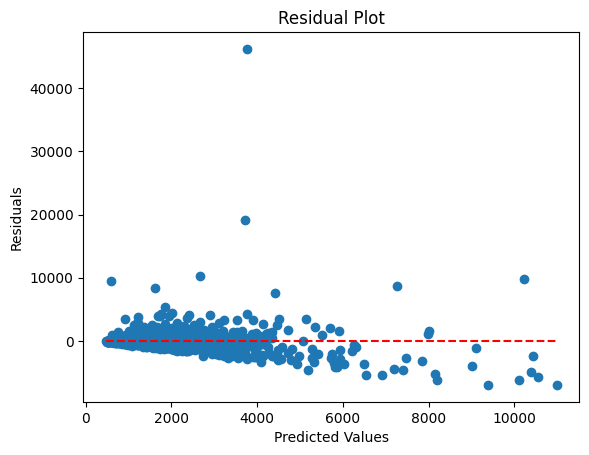

In [35]:
residuals = y_test - rf_predictions
plt.scatter(rf_predictions, residuals)
plt.hlines(0, min(rf_predictions), max(rf_predictions), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Results
- Better

### Gradient Boosting Regressor

In [27]:
learning_rates = [0.01, 0.05, 0.1]

for lr in learning_rates:
    gb_model = GradientBoostingRegressor(learning_rate=lr, random_state=SEED)
    gb_model.fit(X_train_scaled, y_train)
    gb_predictions = gb_model.predict(X_test_scaled)
    
    print(f"Learning rate: {lr}")
    print("R^2:", gb_model.score(X_test_scaled, y_test))
    print("First 5 predictions:", np.round(gb_predictions[:5], 1))
    print("First 5 actual values:", np.round(y_test[:5].values, 1))
    print("\n")


Learning rate: 0.01
R^2: 0.08923314007807559
First 5 predictions: [1582.4 1368.  1440.6 1440.6 1368. ]
First 5 actual values: [ 700. 1000. 1200. 1429.  800.]


Learning rate: 0.05
R^2: -0.0758357109402128
First 5 predictions: [1664.1 1183.1 1312.6 1431.  1423.1]
First 5 actual values: [ 700. 1000. 1200. 1429.  800.]


Learning rate: 0.1
R^2: 0.08131221944705225
First 5 predictions: [1324.3 1166.5 1304.4 1434.8 1378.6]
First 5 actual values: [ 700. 1000. 1200. 1429.  800.]




### Results
- Baad, better with low learning rate 

## k-Nearest Neighbors 


In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(10, 30)),  
    'weights': ['uniform', 'distance']
}

# Initialize the model
knn_model = KNeighborsRegressor()

# Initialize the grid search
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_knn.fit(X_train_scaled, y_train)



In [29]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best R^2 score: ", grid_search_knn.best_score_)

# Use the best estimator to make predictions
best_knn_model = grid_search_knn.best_estimator_
knn_predictions = best_knn_model.predict(X_test_scaled)

# Print the R^2 score on the test set
print("R^2 on test set: ", best_knn_model.score(X_test_scaled, y_test))

# Print the first 5 predictions rounding to 1 decimal place
print(np.round(knn_predictions[:5], 1))

# Print the first 5 actual values
print(np.round(y_test[:5].values, 1))

Best parameters found:  {'n_neighbors': 29, 'weights': 'distance'}
Best R^2 score:  0.07892863464508504
R^2 on test set:  0.1883242646705766
[1284.1 1213.9 1142.5 1345.3 1294.1]
[ 700. 1000. 1200. 1429.  800.]


/opt/anaconda3/envs/applied-data-science/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


### Results
- Bad

## Neural Network 

In [ ]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the model
mlp_model = MLPRegressor(random_state=SEED, max_iter=1000)

# Initialize the grid search
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=3, verbose=2)

# Fit the grid search to the data
grid_search_mlp.fit(X_train_scaled, y_train)



Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best R^2 score:  0.11140928365081475
R^2 on test set:  0.21239904294031786
[2560.6 1603.5 1107.7 1828.1 1330.2]
[ 700. 1000. 1200. 1429.  800.]


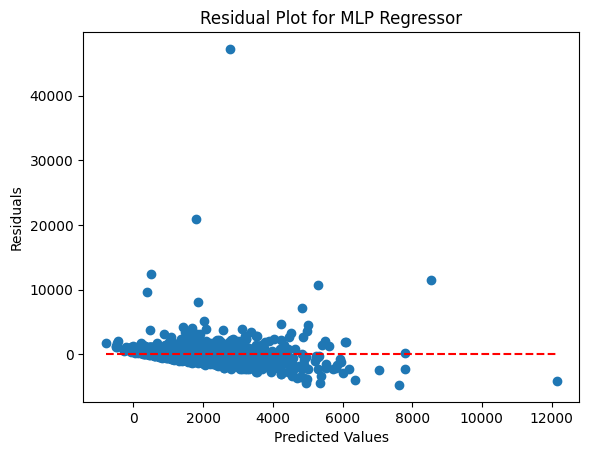

In [48]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search_mlp.best_params_)
print("Best R^2 score: ", grid_search_mlp.best_score_)

# Use the best estimator to make predictions
best_mlp_model = grid_search_mlp.best_estimator_
mlp_predictions = best_mlp_model.predict(X_test_scaled)

# Print the R^2 score on the test set
print("R^2 on test set: ", best_mlp_model.score(X_test_scaled, y_test))

# Print the first 5 predictions rounding to 1 decimal place
print(np.round(mlp_predictions[:5], 1))

# Print the first 5 actual values
print(np.round(y_test[:5].values, 1))


# Create a function


### Results
- Needs way more experimenting